In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import json
from itertools import product
import pickle
import numpy as np

## tertile distribution

In [2]:
#tertile path
tertile_path = 'data/tertiles/tertile_dict.json'

tertile_dict = json.load(open(tertile_path))
order = ['Disease', 'Gene/Protein', 'Organism']

In [3]:
tertile_dict.keys()

dict_keys(['3,1,1', '3,2,1', '3,3,1', '2,2,1', '2,1,1', '2,3,1', '1,1,1', '1,2,1', '1,3,1', '1,2,2', '1,3,2', '1,1,2', '2,2,2', '2,1,2', '2,3,2', '3,3,2', '3,2,2', '3,1,2', '1,2,3', '1,3,3', '1,1,3', '2,3,3', '2,2,3', '2,1,3', '3,3,3', '3,2,3', '3,1,3'])

In [4]:
tertile_dist = {}

In [5]:
for key in tertile_dict:
#     print(key)
    new_key = key.replace('3', 'H').replace('2', 'M').replace('1', 'L').replace(',', '-')
    tertile_dist[new_key] = len(tertile_dict[key])

In [6]:
labels = ['-'.join(l)for l in product('LMH', repeat=3)]

In [7]:
# labels

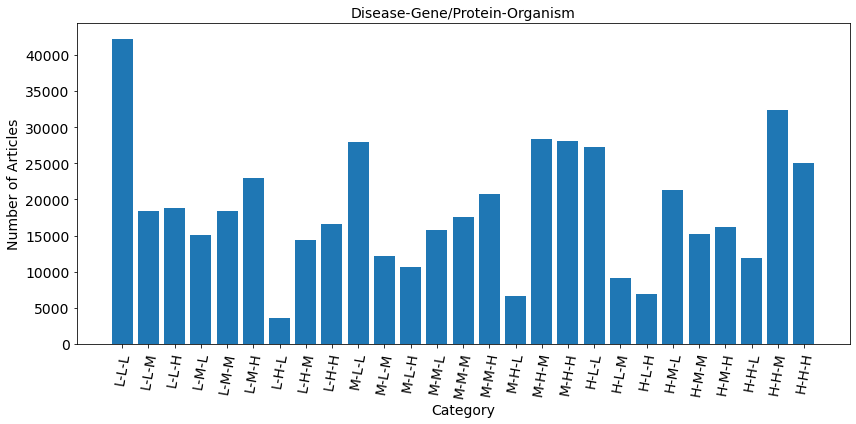

In [8]:
plt.figure(figsize=(12,6))
x = range(len(labels))
y = [tertile_dist[k] for k in labels]
plt.bar(x,y)
plt.ylabel('Number of Articles', fontsize=14)
plt.xlabel('Category', fontsize=14)
plt.title('-'.join(order), fontsize=14)
plt.xticks(range(len(x)), labels, rotation='80', fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('bins-distribution.png')

In [9]:
import seaborn as sns

## body_size histogram

In [10]:
def filter_none(counts):
    return [c if c else 0 for c in counts]

def filter_zero(counts):
    return [c for c in counts if c>5000]

def plot_bodysize_hist():
    with open('data/summary_stats.pickle', 'rb') as f:
        sum_summary = pickle.load(f)

    gene_sum, disease_sum, organism_sum, body_sum_ori, gene_count, disease_count, organism_count = zip(*sum_summary)

    body_sum_ori = filter_none(body_sum_ori)
    print('remove none')
    print(len(body_sum_ori))
    #body_sum_ori = filter_zero(body_sum_ori)
    #print('remove zero')
    #print(len(body_sum_ori))
    plt.figure(figsize=(12,6))
    bins=list(range(0, 101000, 2000))
    bins_lab=list(range(0, 110000, 10000))
    sns.distplot(a=body_sum_ori, bins=bins, hist_kws={"edgecolor": 'black'})
    #plt.hist(body_sum_ori, bins=bins, color='lightblue')
    #plt.xlim([0,400000])
    plt.xlim([0,100000])
    plt.ylabel('Number of Articles', fontsize=20)
    plt.xlabel('Body Size (Byte)', fontsize=20)
    plt.title('Body Size vs Number of Articles', fontsize=26)
    #plt.set_xticks(bins)
    plt.xticks(ticks=bins_lab, fontsize=18)
    plt.yticks(fontsize=16)

    plt.tight_layout()
    plt.savefig('bodysize-distribution.png')
    
    
    return body_sum_ori

remove none
991529


/Users/saha/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


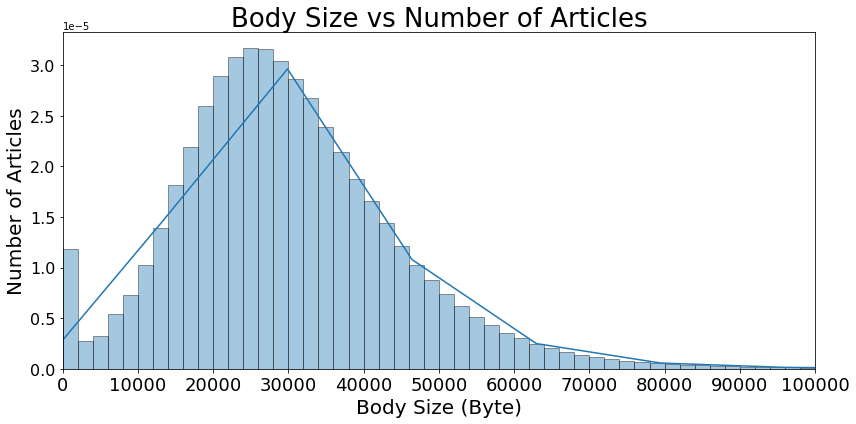

In [11]:
body_sum_ori=plot_bodysize_hist()
#min_range=0
#max_range=81920
#filtered_data=[i for i in body_sum_ori if min_range<i<=max_range]
#non_zero=[i for i in body_sum_ori if i>0]
#print(min(body_sum_ori))
#print(max(body_sum_ori))
#print(len(zero))
#plt.boxplot(filtered_data)
#np.quantile(filtered_data, 0.25)

/Users/saha/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


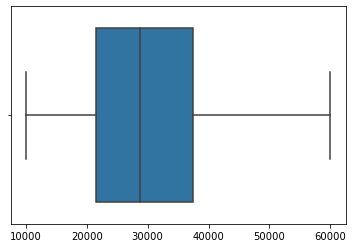

25600

In [18]:
filtered_data=[i for i in body_sum_ori if 10000<i<=60000]
sns.boxplot(filtered_data)
plt.show()
25*1024

In [20]:

for i in range(0,101000, 1024):
    print('window: ' + str(i) + "-" + str(i+25600))
    min_range=i
    max_range=i+25600
    filtered_data=[i for i in body_sum_ori if min_range<i<=max_range]
    print(len(filtered_data))

503933/991529

window: 0-25600
406546
window: 1024-26624
438334
window: 2048-27648
447845
window: 3072-28672
475953
window: 4096-29696
505074
window: 5120-30720
532093
window: 6144-31744
556871
window: 7168-32768
579388
window: 8192-33792
599999
window: 9216-34816
617975
window: 10240-35840
633563
window: 11264-36864
646035
window: 12288-37888
655676
window: 13312-38912
661760
window: 14336-39936
664519
window: 15360-40960
663708
window: 16384-41984
659930
window: 17408-43008
653061
window: 18432-44032
642879
window: 19456-45056
629519
window: 20480-46080
613313
window: 21504-47104
594662
window: 22528-48128
574204
window: 23552-49152
552060
window: 24576-50176
528454
window: 25600-51200
503933
window: 26624-52224
478826
window: 27648-53248
453224
window: 28672-54272
427825
window: 29696-55296
402081
window: 30720-56320
377203
window: 31744-57344
352715
window: 32768-58368
328973
window: 33792-59392
305874
window: 34816-60416
284126
window: 35840-61440
263319
window: 36864-62464
243443
window: 37888-

0.5082382865251546

In [15]:
min_range=0
max_range=81920
filtered_data=[i for i in body_sum_ori if min_range<i<=max_range]


percentiles
22986.0 28346.0 33931.0
(18,)
(45,)
0.46015384442802626
2.8359346933288007e-05


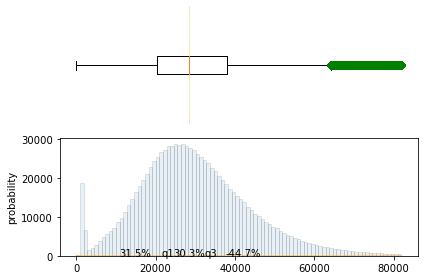

In [16]:
import numpy as np
import scipy
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
#from matplotlib.mlab import normpdf

# dummy data
mu = 0
sigma = 1
n_bins = 90
#s = np.random.normal(mu, sigma, 1000)

s = filtered_data
mu=np.mean(s)
sigma=np.std(s)

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)

#histogram
n, bins, patches = axes[1].hist(s, n_bins, alpha=.1, edgecolor='black' )
pdf = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2))

median, q1, q3 = np.percentile(s, 50), np.percentile(s, 33), np.percentile(s, 66)
print('percentiles')
print(q1, median, q3)

#probability density function
axes[1].plot(bins, pdf, color='orange', alpha=.6)

#to ensure pdf and bins line up to use fill_between.
bins_1 = bins[(bins >= q1-1.5*(q3-q1)) & (bins <= q1)] # to ensure fill starts from Q1-1.5*IQR
bins_2 = bins[(bins <= q3+1.5*(q3-q1)) & (bins >= q3)]
pdf_1 = pdf[:int(len(pdf)/2)]
pdf_2 = pdf[int(len(pdf)/2):]

print(bins_1.shape)
print(pdf_1.shape)
pdf_1 = pdf_1[(pdf_1 >= norm(mu,sigma).pdf(q1-1.5*(q3-q1))) & (pdf_1 <= norm(mu,sigma).pdf(q1))]
pdf_2 = pdf_2[(pdf_2 >= norm(mu,sigma).pdf(q3+1.5*(q3-q1))) & (pdf_2 <= norm(mu,sigma).pdf(q3))]

#fill from Q1-1.5*IQR to Q1 and Q3 to Q3+1.5*IQR
#axes[1].fill_between(bins_1, pdf_1, 0, alpha=.6, color='orange')
#axes[1].fill_between(bins_2, pdf_2, 0, alpha=.6, color='orange')

print(norm(mu, sigma).cdf(median))
print(norm(mu, sigma).pdf(median))

#add text to bottom graph.
axes[1].annotate("{:.1f}%".format(100*norm(mu, sigma).cdf(q1)), xy=((q1-1.5*(q3-q1)+q1)/2, 0), ha='center')
axes[1].annotate("{:.1f}%".format(100*(norm(mu, sigma).cdf(q3)-norm(mu, sigma).cdf(q1))), xy=(median, 0), ha='center')
axes[1].annotate("{:.1f}%".format(100*(norm(mu, sigma).cdf(q3+1.5*(q3-q1)-q3)-norm(mu, sigma).cdf(q3))), xy=((q3+1.5*(q3-q1)+q3)/2, 0), ha='center')
axes[1].annotate('q1', xy=(q1, norm(mu, sigma).pdf(q1)), ha='center')
axes[1].annotate('q3', xy=(q3, norm(mu, sigma).pdf(q3)), ha='center')

axes[1].set_ylabel('probability')

#top boxplot
axes[0].boxplot(s, 0, 'gD', vert=False)
axes[0].axvline(median, color='orange', alpha=.6, linewidth=.5)
axes[0].axis('off')

plt.subplots_adjust(hspace=0)
#plt.show()
plt.tight_layout()
plt.savefig('bodysize-hist-boxplot.png')

In [17]:
print(s)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
def bodysize_filter(data):
    lower = 25600
    upper = 51200
    indices = []
    filtered = []
    for i,t in enumerate(data):
        if not t:
            continue
        if lower <= t <= upper:
            indices.append(i)
            filtered.append(t)
    return filtered, indices

filtered, indices=bodysize_filter(body_sum_ori)
print(len(filtered))
print(len(body_sum_ori))

503960
991529


## Distribution of annotations after body size filter

In [169]:
def bodysize_filter(data):
    lower = 25600
    upper = 51200
    indices = []
    filtered = []
    for i,t in enumerate(data):
        if not t:
            continue
        if lower <= t <= upper:
            indices.append(i)
            filtered.append(t)
    return filtered, indices

def plot_anno_hist(gene, disease, organism):
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    
    axs[0].hist(gene, bins=100)
    axs[0].set_ylabel('Number of Articles', fontsize=14)
    axs[0].set_xlabel('Number of Gene Mentions', fontsize=14)
    axs[0].set_title('Gene/Protein', fontsize=14)
    axs[0].tick_params(axis='x', labelsize=12)
    axs[0].tick_params(axis='y', labelsize=12)

    
    axs[1].hist(disease, bins=100)
#     axs[1].set_ylabel('Article Count', fontsize=14)
    axs[1].set_xlabel('Number of Disease Mentions', fontsize=14)
    axs[1].set_title('Disease', fontsize=14)
    axs[1].tick_params(axis='x', labelsize=12)
    axs[1].tick_params(axis='y', labelsize=12)

    
    axs[2].hist(organism, bins=100)
#     axs[2].set_ylabel('Article Count', fontsize=14)
    axs[2].set_xlabel('Number of Organism Mentions', fontsize=14)
    axs[2].set_title('Organism', fontsize=14)
    axs[2].tick_params(axis='x', labelsize=12)
    axs[2].tick_params(axis='y', labelsize=12)
    
    plt.tight_layout()
    plt.savefig('mention-distribution.pdf')
        
def plot_annotatrion_hist():
    with open('data/summary_stats.pickle', 'rb') as f:
        sum_summary = pickle.load(f)

    gene_sum, disease_sum, organism_sum, body_sum_ori, gene_count, disease_count, organism_count = zip(*sum_summary)

    body_size_filtered, filtered_indices = bodysize_filter(body_sum_ori)
    print(min(body_size_filtered), max(body_size_filtered), len(filtered_indices))
    
    gene_sum_filtered = np.array(gene_sum)[filtered_indices]
    disease_sum_filtered = np.array(disease_sum)[filtered_indices]
    organism_sum_filtered = np.array(organism_sum)[filtered_indices]
    
    plot_anno_hist(gene_sum_filtered, disease_sum_filtered, organism_sum_filtered)
    return gene_sum_filtered, disease_sum_filtered, organism_sum_filtered


25600 51200 503960


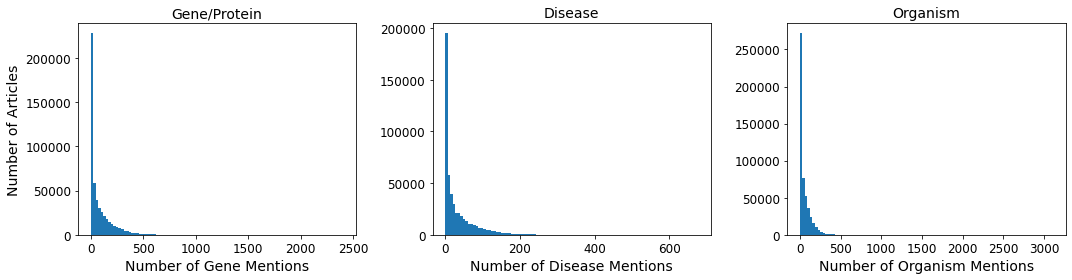

In [170]:
gene_sum_filtered, disease_sum_filtered, organism_sum_filtered = plot_annotatrion_hist()

In [176]:
max(gene_sum_filtered)

2408

## missed patterns analysis

In [25]:
pattern_stats_path = "data/missed_patterns.csv"

In [26]:
pattern_df = pd.read_csv(pattern_stats_path)

In [27]:
pattern_df['tag'].unique()

array(['CRT_DS', 'MIS_DS', 'WT_GP', 'WT_DS', 'NGD', 'WT_OG', 'CRT_OG',
       'CRT_GP', 'WS_GP', 'MIS_OG', 'WS_OG', 'MIS_GP', 'WT_DS,GP',
       'WT_GP,OG', 'WT_OG,DS', 'WS_DS', 'WT_GP,DS', 'WS_GP,OG',
       'WT_OG,GP', 'YGD', 'AMB', 'WT_DS,OG', 'WT_GP,OG,WS', 'WT_DS,OG,WS',
       'MIS_GP,ALL', 'CRt_OG', 'CRT_GP,ALL', 'WT_OG,DS,WS', 'WT_DS,GP,WS',
       'WT_OG,GP,WS', 'WT_DS,ALL'], dtype=object)

In [28]:
annotator_map = {'GROUP0': "Annotator A", 'GROUP1': "Annotator B", 'GROUP2': "Annotator C",}
pattern_df['annotator'] = pattern_df['annotator'].replace(annotator_map)

In [29]:
len(pattern_df.query('annotator == "Annotator A" and matched == "yes"')), len(pattern_df.query('annotator == "Annotator A" and matched == "no"')),

(18309, 1034)

In [30]:
len(pattern_df.query('annotator == "Annotator B" and matched == "yes"')), len(pattern_df.query('annotator == "Annotator B" and matched == "no"')),

(18299, 1027)

In [31]:
len(pattern_df.query('annotator == "Annotator C" and matched == "yes"')), len(pattern_df.query('annotator == "Annotator C" and matched == "no"')),

(18296, 1029)

### Match distribution

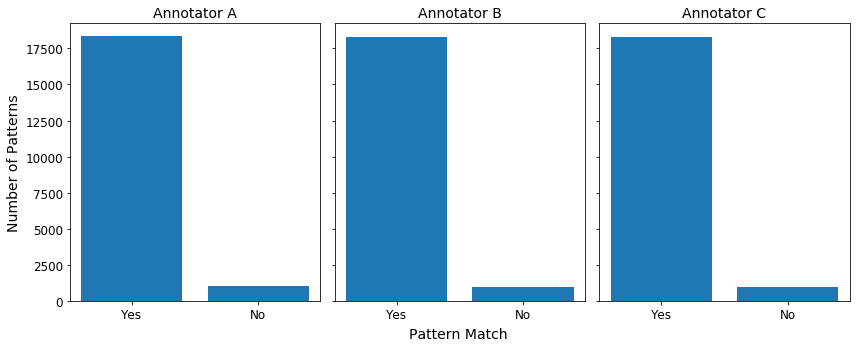

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True)
names = ['Yes', 'No']
axs[0].bar(names, [len(pattern_df.query('annotator == "Annotator A" and matched == "yes"')), len(pattern_df.query('annotator == "Annotator A" and matched == "no"'))])
axs[0].set_ylabel('Number of Patterns', fontsize=14)
# axs[0].set_xlabel('Pattern Match', fontsize=14)
axs[0].set_title('Annotator A', fontsize=14)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].grid(False)


axs[1].bar(names, [len(pattern_df.query('annotator == "Annotator B" and matched == "yes"')), len(pattern_df.query('annotator == "Annotator B" and matched == "no"'))])
# axs[1].set_ylabel('Number of Patterns', fontsize=14)
# axs[1].set_xlabel('Pattern Match', fontsize=14)
axs[1].set_title('Annotator B', fontsize=14)
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].grid(False)


axs[2].bar(names, [len(pattern_df.query('annotator == "Annotator C" and matched == "yes"')), len(pattern_df.query('annotator == "Annotator C" and matched == "no"'))])
# axs[2].set_ylabel('Number of Patterns', fontsize=14)
# axs[2].set_xlabel('Pattern Match', fontsize=14)
axs[2].set_title('Annotator C', fontsize=14)
axs[2].tick_params(axis='x', labelsize=12)
axs[2].tick_params(axis='y', labelsize=12)
axs[2].grid(False)

fig.text(0.535, 0.06, 'Pattern Match', va='center', ha='center', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.savefig('pattern-match-analysis.pdf')

In [102]:
# plt.figure(figsize=(12,6))
# g = sns.catplot(x="matched", 
#                 col="annotator", 
#                 data=pattern_df, 
#                 saturation=.5, 
#                 kind="count", 
#                 ci=None, 
#                 )
# g.set_axis_labels("Pattern Match", "Number of Patterns").set_xticklabels(["Yes", "No"]).set_titles("{col_name}").despine(left=True)
# plt.tight_layout()
# # plt.savefig('pattern-match-analysis.pdf')

### missed distribution

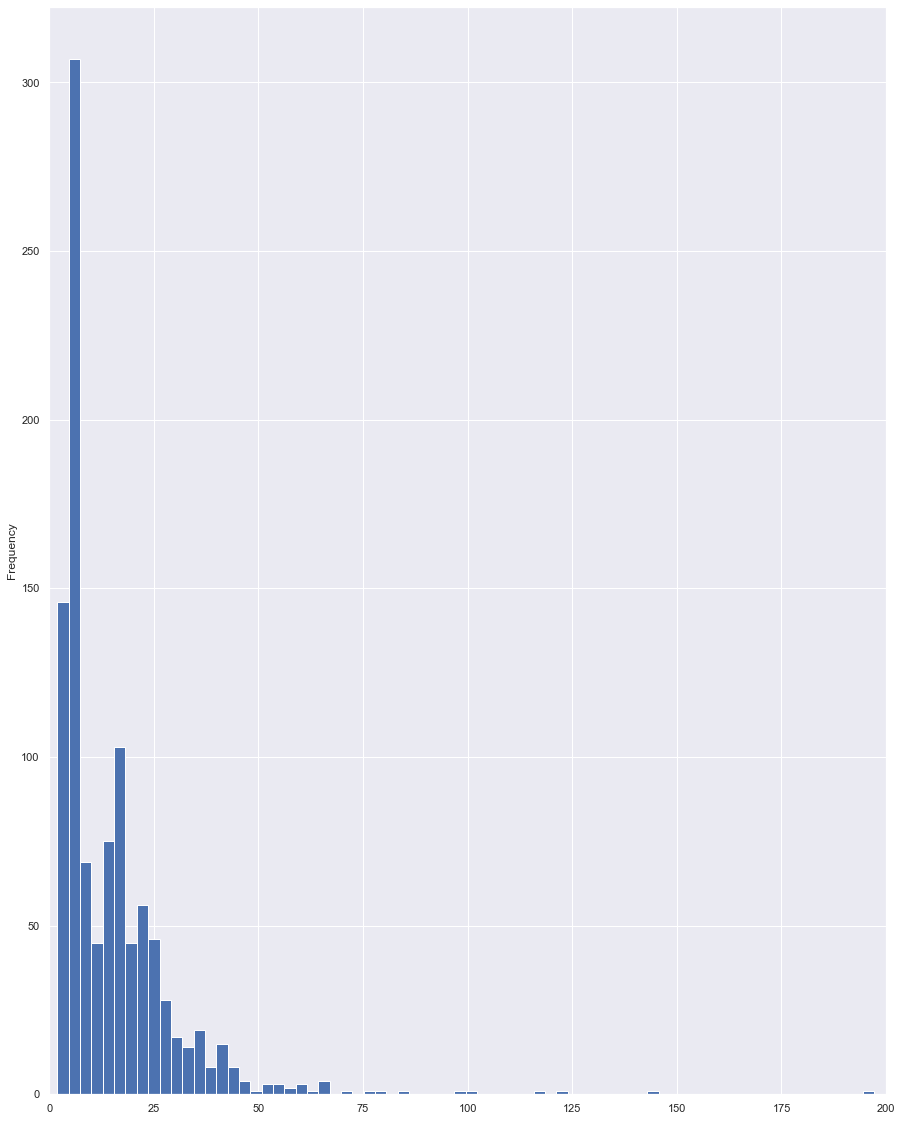

In [123]:
pattern_df.query('annotator == "Annotator A"and matched == "no"')['exact'].apply(len).plot.hist(bins=100,xlim=(0,200))

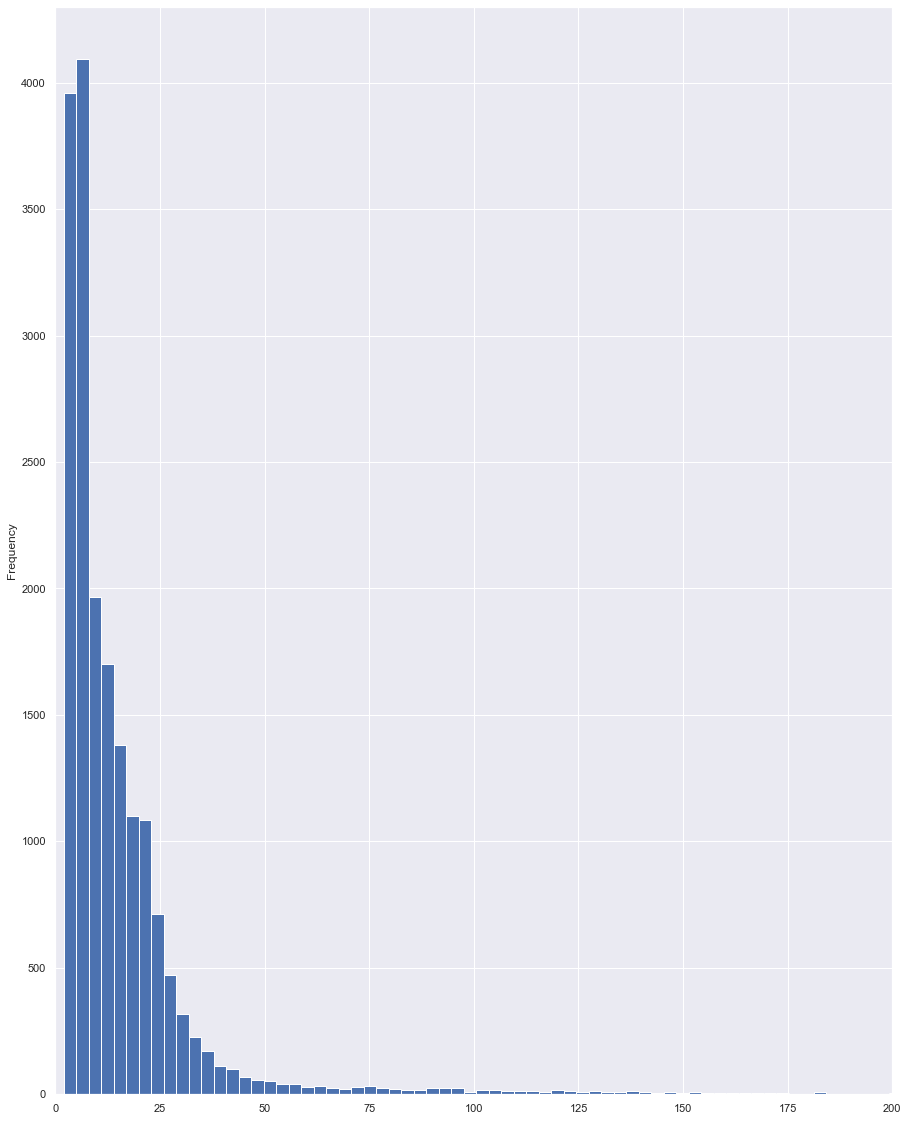

In [125]:
pattern_df.query('annotator == "Annotator A"and matched == "yes"')['exact'].apply(len).plot.hist(bins=300, xlim=(0,200))

In [126]:
# # sns.set(rc={'figure.figsize':(15,20)})
# plt.figure(figsize=(16,6))
# g = sns.catplot(x="tag",
#                 col="annotator", 
#                 data=pattern_df[pattern_df['matched']=='no'], 
#                 saturation=.5, 
#                 kind="count", 
#                 ci=None, 
#                 )
# g.set_xticklabels(rotation=90)
# plt.tight_layout()

In [59]:
list(range(0, 101000, 1000))

[0,
 1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000,
 11000,
 12000,
 13000,
 14000,
 15000,
 16000,
 17000,
 18000,
 19000,
 20000,
 21000,
 22000,
 23000,
 24000,
 25000,
 26000,
 27000,
 28000,
 29000,
 30000,
 31000,
 32000,
 33000,
 34000,
 35000,
 36000,
 37000,
 38000,
 39000,
 40000,
 41000,
 42000,
 43000,
 44000,
 45000,
 46000,
 47000,
 48000,
 49000,
 50000,
 51000,
 52000,
 53000,
 54000,
 55000,
 56000,
 57000,
 58000,
 59000,
 60000,
 61000,
 62000,
 63000,
 64000,
 65000,
 66000,
 67000,
 68000,
 69000,
 70000,
 71000,
 72000,
 73000,
 74000,
 75000,
 76000,
 77000,
 78000,
 79000,
 80000,
 81000,
 82000,
 83000,
 84000,
 85000,
 86000,
 87000,
 88000,
 89000,
 90000,
 91000,
 92000,
 93000,
 94000,
 95000,
 96000,
 97000,
 98000,
 99000,
 100000]